<a href="https://colab.research.google.com/github/csplatti/inspirit-2024/blob/main/Summarization_Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies and Import Libraries

In [ ]:
!pip install datasets==2.21.0
!pip install langchain==0.2.12
!pip install openai==1.42.0
!pip install httpx==0.27.2
!pip install matplotlib==3.10.5
!pip install scikit-learn==1.7.1
!pip install nltk==3.9.1
!pip install wordcloud==1.9.4
!pip install gensim==4.3.3
!pip install rouge==1.0.1
!pip install dotenv==0.9.9


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3

In [46]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import Dataset, load_dataset

# Download data
ds = load_dataset("abisee/cnn_dailymail", "3.0.0")

# Downloading and Sorting Data

In [47]:
# create splits
ds_train = ds['train'].to_pandas()
ds_test = ds['test'].to_pandas()
ds_valid = ds['validation'].to_pandas()

# combine splits (we will split ourselves)
ds_all = pd.concat([ds_train, ds_test, ds_valid])

In [48]:
# Quick look at our data
samples = len(ds_all)
print(samples)
ds_all.head()

311971


,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star...",Harry Potter star Daniel Radcliffe gets £20M f...,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,Editor's note: In our Behind the Scenes series...,Mentally ill inmates in Miami are housed on th...,ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...","NEW: ""I thought I was going to die,"" driver sa...",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,WASHINGTON (CNN) -- Doctors removed five small...,"Five small polyps found during procedure; ""non...",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,(CNN) -- The National Football League has ind...,"NEW: NFL chief, Atlanta Falcons owner critical...",7fe70cc8b12fab2d0a258fababf7d9c6b5e1262a


In [49]:
# train test split
from sklearn.model_selection import train_test_split

# print(ds_all.head())
# print(ds_all.columns)

articles = ds_all['article']
highlights = ds_all['highlights']

# print(articles.iloc[0])
# print(highlights.iloc[0])
# print("#####")

# breakpoint()

X_train, X_test, y_train, y_test  = train_test_split(articles, highlights, random_state=9 ,test_size=0.2)

# print(X_train.iloc[:len(X_train)])
# print(type(X_train))
# print(y_train.iloc[1])

# Tokenize, Lemmatize, and Remove Stop Words & Punctuation

In [50]:
# imports
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/corbinplatti_school/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/corbinplatti_school/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/corbinplatti_school/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/corbinplatti_school/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [51]:
std_stopwords = stopwords.words('english')
our_stopwords = ["est", "'", "`", "'s", '"', ",", "``", "''", '’', '‘', '--', "n't"]
punctuation = string.punctuation
lemmatizer = WordNetLemmatizer()

def isTimeStamp(text):
  for char in text:
    if not (char.isdigit() or char == ':'):
      return False
  return True

# tokenization and text cleaning
def cleanText(text):
  tokens = word_tokenize(text)
  cleanedText = []

  for tok in tokens:
    if tok.lower() not in our_stopwords and tok.lower() not in std_stopwords and tok.lower() not in punctuation and not isTimeStamp(tok.lower()):
      tok = lemmatizer.lemmatize(tok.lower())
      cleanedText.append(tok)

  return cleanedText

#function to clean all articles/array of bodies of text
def clean_articles(articles):
  clean_articles = []
  for article in articles:
    clean_articles.append(cleanText(article))
  return clean_articles

X_train_cleaned = clean_articles(X_train.iloc[:200])
y_train_cleaned = clean_articles(y_train.iloc[:200])

print(type(X_train_cleaned))
print(X_train_cleaned[0])

<class 'list'>
['jan', 'moir', 'published', 'october', 'updated', 'october', 'time', 'year', 'usually', 'crisp', 'lush', 'page', 'new', 'autobiography', 'celebrity', 'battle', 'out-confess', 'ever', 'lurid', 'personal', 'disclosure', 'start', 'christmas', 'market', 'coming', 'fast', 'competition', 'get', 'best-seller', 'list', 'intense', 'one', 'dependable', 'way', 'ensure', 'life', 'story', 'stand', 'shelf', 'lard', 'revelation', 'two', 'shock', 'fan', 'also', 'neatly', 'encouraging', 'sympathy', 'queasy', 'sex', 'attack', 'vile', 'one', 'wonder', 'amanda', 'holden', 'motive', 'hinting', 'identity', 'attacker', 'binge', 'hell', 'love', 'rat', 'secret', 'marriage', 'woe', 'know', 'sort', 'thing', 'strangely', 'enough', 'headline-grabbing', 'divulgence', 'marmalade-droppers', 'du', 'jour', 'always', 'tend', 'follow', 'trend', 'track', 'unfathomable', 'tectonic', 'shift', 'deep', 'crust', 'celebrity', 'world', 'somehow', 'find', 'suffering', 'thing', 'time', 'recent', 'fad', 'bullied', '

# Data Visualization #

In [52]:
# COPIED FROM: https://www.datacamp.com/tutorial/wordcloud-python
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [53]:
words = []

for i in range(len(X_train_cleaned)):
  for j in range(len(X_train_cleaned[i])):
    words.append(X_train_cleaned[i][j])

print(len(words))

74019


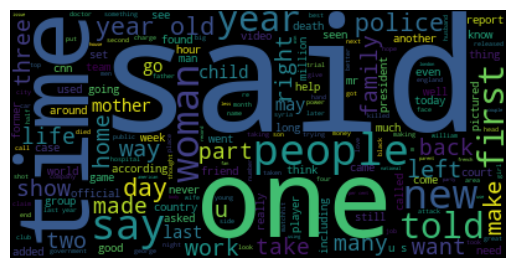

In [54]:
wordcloud = WordCloud().generate(" ".join(words))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Embeddings #

In [55]:
from gensim.models import Word2Vec
import numpy as np

model = Word2Vec(X_train_cleaned, min_count=1)

vector_words = model.wv.index_to_key

type(vector_words)

print(vector_words)

['said', 'year', 'one', 'time', 'would', 'new', 'last', 'also', 'people', 'say', 'police', 'woman', 'first', 'mr', 'told', 'could', 'day', 'like', 'two', 'make', 'right', 'left', 'get', 'way', 'home', 'cnn', 'world', 'take', 'month', 'want', 'week', 'family', 'court', 'found', 'show', 'since', 'video', 'back', 'life', 'president', 'many', 'child', 'made', 'work', 'part', 'according', 'three', 'friend', 'may', 'death', 'going', 'go', 'mother', 'know', 'report', 'even', 'see', 'u', 'game', 'set', 'team', 'state', 'still', 'another', 'help', 'seen', 'around', 'official', 'country', 'man', 'group', 'night', 'attack', 'thing', 'think', '–', 'well', 'united', 'men', 'went', 'hour', 'good', 'former', 'later', 'got', 'face', 'case', 'pictured', 'never', 'need', 'including', 'come', 'government', 'came', 'called', 'hospital', 'asked', 'million', 'added', 'house', 'used', 'much', 'put', 'london', 'today', 'however', 'city', 'trying', 'girl', 'williams', 'took', 'look', 'second', 'player', 'four'

In [56]:
vector_words_vectors = []
for word in vector_words:
  vector_words_vectors.append(model.wv[word])

# print(vector_words_vectors[:5])

vector_words_vectors = np.array(vector_words_vectors)
print(vector_words_vectors.shape)

print(vector_words[0])
print(vector_words_vectors[0])

(13424, 100)
said
[-0.30422217  0.8032373   0.5896332   0.03507079  0.07092744 -1.3036847
  0.20314202  1.7873702  -0.4483363  -0.41390646 -0.31997913 -1.1062459
 -0.18731935  0.27035758  0.22232457 -0.637052    0.16281854 -0.8007224
  0.07612398 -1.3948133   0.2827248   0.20365283  0.48427615 -0.26422295
 -0.03857184  0.04735364 -0.40997463 -0.35833913 -0.79126084 -0.20164613
  0.46492693  0.22128186 -0.11308368 -0.42063832 -0.22641185  0.7584424
 -0.2003402  -0.87692356 -0.22491753 -1.1690838   0.12312724 -0.535089
 -0.62249184  0.16049124  0.45647016 -0.5227295  -0.82010424  0.2127356
  0.20385742  0.62028664  0.35168004 -0.653499   -0.33778518 -0.03377149
 -0.6616558   0.11503083  0.3998527  -0.11702283 -0.49554628 -0.06491141
  0.15076576  0.3180185  -0.17956239 -0.16692564 -0.73829436  0.87170047
  0.15193957  0.67398244 -0.8183089   0.9346897  -0.32063812  0.77598643
  0.78760993 -0.41251668  0.77256256  0.4591008   0.3239757  -0.00904026
 -0.7102514   0.02693775 -0.4062282  -0.

#PCA#

In [57]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(vector_words_vectors)

print(result.shape)

(13424, 2)


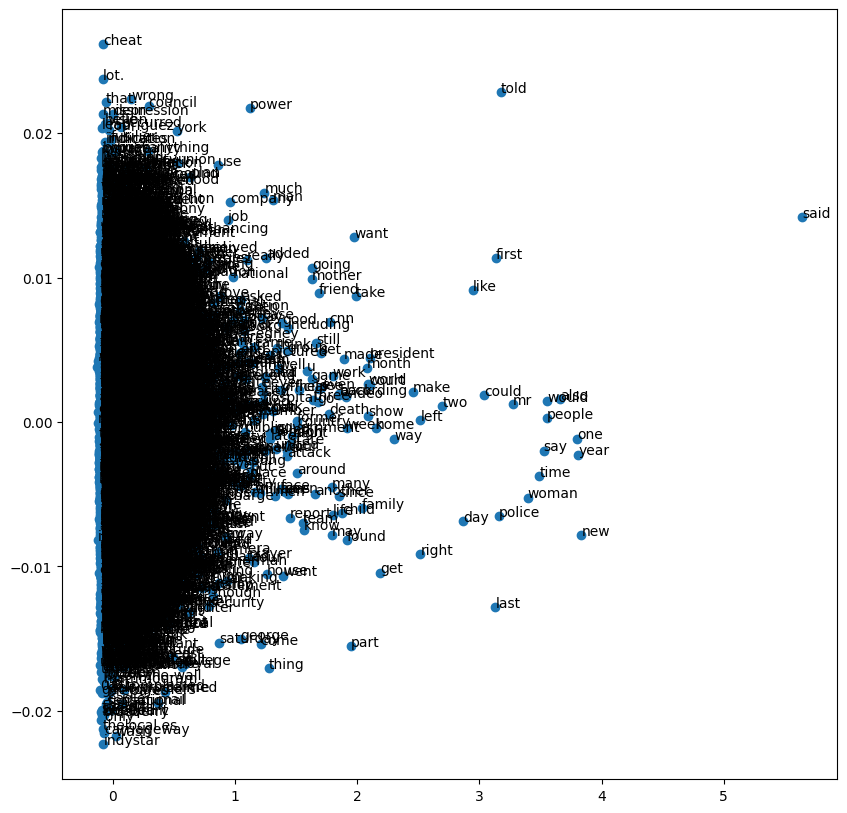

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(vector_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [59]:
print(model.wv.key_to_index)

{'said': 0, 'year': 1, 'one': 2, 'time': 3, 'would': 4, 'new': 5, 'last': 6, 'also': 7, 'people': 8, 'say': 9, 'police': 10, 'woman': 11, 'first': 12, 'mr': 13, 'told': 14, 'could': 15, 'day': 16, 'like': 17, 'two': 18, 'make': 19, 'right': 20, 'left': 21, 'get': 22, 'way': 23, 'home': 24, 'cnn': 25, 'world': 26, 'take': 27, 'month': 28, 'want': 29, 'week': 30, 'family': 31, 'court': 32, 'found': 33, 'show': 34, 'since': 35, 'video': 36, 'back': 37, 'life': 38, 'president': 39, 'many': 40, 'child': 41, 'made': 42, 'work': 43, 'part': 44, 'according': 45, 'three': 46, 'friend': 47, 'may': 48, 'death': 49, 'going': 50, 'go': 51, 'mother': 52, 'know': 53, 'report': 54, 'even': 55, 'see': 56, 'u': 57, 'game': 58, 'set': 59, 'team': 60, 'state': 61, 'still': 62, 'another': 63, 'help': 64, 'seen': 65, 'around': 66, 'official': 67, 'country': 68, 'man': 69, 'group': 70, 'night': 71, 'attack': 72, 'thing': 73, 'think': 74, '–': 75, 'well': 76, 'united': 77, 'men': 78, 'went': 79, 'hour': 80, '

# GPT Prompting #

In [60]:
from openai import OpenAI
from langchain import PromptTemplate
from dotenv import load_dotenv
import os

# Load environment variables from a .env file
load_dotenv()

# Get the API key from the .env file
api_key = os.getenv('GPT_API_KEY')

client = OpenAI(
    api_key=api_key
)

In [61]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant who only speaks how people spoke during shakespearean times",
        },
        {
            "role": "user",
            "content": "What is the best open market LLM",
        }
    ],
    model="gpt-3.5-turbo",
)
print(chat_completion.choices[0].message.content)

Hark thee, the finest open market for an LLM would be the one that doth offer a wide array of goods and services, fair prices, and true artisans in their craft. Mayhaps ye seek a place where merchants and buyers alike doth engage in fair trade and mutual benefit. Verily, the best open market for an LLM is one that doth fulfill these requirements.


### Sentiment Analysis Example

In [62]:
template = """
You are an expert analyst who is very good at determining whether a given sample of text is positive or negative. Your job is to take the text given below in back-ticks and classify it into "positive" or "negative".

```
{sentence}
```

Sentiment:
"""
prompt = PromptTemplate(input_variables=["sentence"], template=template)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt.format(sentence = "This was be great"),
        }
    ],
    model="gpt-3.5-turbo",
)
print(chat_completion.choices[0].message.content)

Positive


### Story Generating Example

In [63]:
template2 = """
You are a talented writer whose job is to write stories. Your job is to take the place and time given below in back-ticks and write a short story that is three sentences long about a character that takes place in that specific place and time.

```
Place: {place}
Time: {time}
```

Short Story:
"""

prompt2 = PromptTemplate(input_variables=["place", "time"], template=template2)
chat_completion2 = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt2.format(place="new york city", time="1950"),
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens=100,
    temperature=0.1,
    frequency_penalty=1,
    presence_penalty=1
)
print(chat_completion2.choices[0].message.content)


In the bustling streets of New York City in 1950, a young aspiring actress named Grace navigated her way through auditions and rehearsals, determined to make it big on Broadway. Despite facing rejection after rejection, she never lost sight of her dream and continued to chase after it with unwavering determination. Finally, one fateful night, Grace landed the lead role in a hit musical that catapulted her into stardom, proving that perseverance pays off in the city that never sleeps.


### Zero-Shot Prompting Summarization Pipeline

In [64]:
# function to be called to generate max length for easy changing
def get_max_length(article):
  return min(4096, round(len(article) / 2))

In [65]:
# variables defs for testing and evaluation
articles = X_train
test_article = articles.iloc[0]
test_max_length = get_max_length(test_article)

In [66]:
summary_template_zs = """
Your job is to shorten the article provided below in back-ticks. Abide by all of the instructions below:
- Write the new version as a whole new article without referencing the original article.
- Leave the text unwrapped in any kind of quotes or parentheses.
- Constrain the word count of the summary to be less than the provided Maximum Length
- RESPOND WITH ONLY THE BODY OF THE FINAL SUMMARY

```
Article: {article}
Maximum Length: {max_length}
```

Summary:
"""

summary_prompt_zs = PromptTemplate(input_variables=["article", "max_length"], template=summary_template_zs)

summary_zs = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": summary_prompt_zs.format(article=test_article, max_length=test_max_length),
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens=test_max_length,
    temperature=0.5,
    frequency_penalty=1,
    presence_penalty=1
)

print(summary_zs.choices[0].message.content)

Celebrities often reveal shocking personal experiences in autobiographies to boost book sales, especially regarding sexual assaults. Recent trends show a surge in sex-attack revelations by female celebrities years after the incidents occurred. While these confessions may help others feel less alone, they can also trivialize the seriousness of such crimes and suggest that enduring violence silently is acceptable until it becomes profitable. Reporting these attacks to authorities would be more impactful than using them as currency for public sympathy and book sales.


In [67]:
def writeSummaryZS(article):
  summary_prompt_zs = PromptTemplate(input_variables=["article", "max_length"], template=summary_template_zs)
  max_length = get_max_length(article)

  return client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": summary_prompt_zs.format(article=article, max_length=max_length),
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens=max_length,
    temperature=0.5,
    frequency_penalty=1,
    presence_penalty=1
  ).choices[0].message.content

s = writeSummaryZS(articles.iloc[3])
print(s)
s_toks = cleanText(s)
# print(len(s_toks))

Divorce settlements can get weird. Marvin Gaye recorded an album for his ex-wife, David Hasselhoff kept his "Hoff" nickname, and Nobel laureates shared their prize money with exes. A Cambodian man literally split the house in half with a saw after accusing his wife of infidelity. Another man took his ex-wife's pet goat in the divorce settlement. Dr. Richard Batista wanted his kidney back from his unfaithful wife during their divorce proceedings but was denied by the court. Zsa Zsa Gabor received 5,000 Gideon Bibles as part of her generous divorce settlement from Conrad Hilton. Georges Simenon stipulated that his ex-wife had to live close by so he could see the children after their divorce. Peter Sellers died before finalizing his fourth divorce, leaving most of his estate to Lynne Frederick instead of their children due to an outdated will.
Total Length: 586


## Bullet Point Summary to Written Summary Pipeline

In [68]:
# prompt for bullet summary
bullet_summary_prompt_template = """
  Your job is to write a bullet point summary of the article within the back-ticks below. You should write with enough detail that a full sentence summary of the article could be re-written from your bullet points alone. Write this bullet summary without referring to the original article.

  ```
   Article: {article}
  ```

  Bullet Point Summary:
"""

def getBulletSummary(article):
  bullet_prompt = PromptTemplate(input_variables=["article"], template=bullet_summary_prompt_template)

  return client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": bullet_prompt.format(article=article),
        }
    ],
    model="gpt-3.5-turbo",
    temperature=0.5,
    frequency_penalty=1,
    presence_penalty=1
  ).choices[0].message.content


In [69]:
# prompt for summary from bullets
bullet_to_written_template = """
  Your job is to write a written summary from a series of bullet points. Abide by all of the instructions below:
  - Write the summary in as much detail as is provided by each bullet point
  - Constrain the word count of the summary to be less than the provided Maximum Length
  - Write without referring to the bullet list you received or to the article.
  - RESPOND WITH ONLY THE BODY OF THE FINAL SUMMARY
  You are provided the bullet points and the Maximum Length in the back ticks below.

  ```
  Bullets: {bullets}
  Maximum Length: {max_length}
  ```

  Written Summary:
"""


def bulletSummaryToWrittenSummary(bullets, max_length):
  bullet_to_written_prompt = PromptTemplate(input_variables=["bullets", "max_length"], template=bullet_to_written_template)

  return client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": bullet_to_written_prompt.format(bullets=bullets, max_length=max_length),
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens=max_length,
    temperature=0.5,
    frequency_penalty=1,
    presence_penalty=1
  ).choices[0].message.content


In [70]:
# article -> bullet point summary -> gpt generated summary
def writeSummaryFSBullet(article):
  bullets = getBulletSummary(article)
  max_length = get_max_length(article)
  summary = bulletSummaryToWrittenSummary(bullets, max_length)
  return summary

test = writeSummaryFSBullet(X_train.iloc[0])
print(test)

Female celebrities have been increasingly sharing their past experiences of sexual assault in autobiographies, with names like Amanda Holden, Madonna, Tulisa Constostavlos, Danniella Westbrook, and Katie Price coming forward. Ulrika Jonsson also previously disclosed a sexual assault by a TV presenter without naming him. This trend has raised concerns about the motives behind these revelations years later and whether justice is being sought. Criticism has been directed at using personal trauma for commercial gain. The impact of these disclosures on perceptions of violence against women is being discussed within society.


## MapReduce to Written Summary Pipeline ##


In [71]:
# break article into separate pieces
def splitArticle(article, n):
    # Calculate the base chunk size
    chunk_size = len(article) // n

    # Calculate the number of characters left after dividing into equal chunks
    remainder = len(article) % n

    chunks = []
    start = 0

    for i in range(n):
        # If there is a remainder, distribute one extra character to the first few chunks
        end = start + chunk_size + (1 if i < remainder else 0)
        chunks.append(article[start:end])
        start = end

    return chunks

In [72]:
#summarize each chunk
split_article_summary_template = """
Your job is to write shorter versions of chunks of text provided below in the back-ticks. Write as if you are re-writing the original chunk, so write without referring to the chunk you are shortening.

```
Chunk: {chunk}
```

Summary:
"""

def summarizeChunk(chunk):
  split_article_summary_prompt = PromptTemplate(input_variables=["chunk"], template=split_article_summary_template)

  return client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": split_article_summary_prompt.format(chunk=chunk),
        }
    ],
    model="gpt-3.5-turbo",
    temperature=0.5,
    frequency_penalty=1,
    presence_penalty=1
  ).choices[0].message.content

In [73]:
#summarize article chunks and store in new array
def summarizeChunks(chunks):
  summaries = []
  for c in chunks:
    summaries.append(summarizeChunk(c))
  return summaries

In [74]:
#compile summaries into one large summary
compile_summaries_template = """
  Your job is to take shortened versions of pieces of an article and compile them into a single article. Abide by all of the instructions below:
  - Write this compilation in the tone of another article
  - Constrain the word count of the summary to be less than the provided Maximum Length
  - RESPOND WITH ONLY THE BODY OF THE FINAL SUMMARY
  You are provided shortened versions of each piece of an article and the desired Maximum Length below:

  ```
  Pieces: {pieces}
  Maximum Length: {max_length}
  ```
"""

def compileChunkSummaries(chunks, max_length):
  compile_summaries_prompt = PromptTemplate(input_variables=["pieces", "max_length"], template=compile_summaries_template)

  return client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": compile_summaries_prompt.format(pieces=chunks, max_length=max_length),
        }
    ],
    model="gpt-3.5-turbo",
    max_tokens=max_length,
    temperature=0.5,
    frequency_penalty=1,
    presence_penalty=1
  ).choices[0].message.content

In [75]:
#original article -> split -> summaries of splits -> summary made from combined summaries

def writeSummaryFSSplit(article):
  n_chunks = 5
  splits = splitArticle(article, n_chunks)
  summaries = summarizeChunks(splits)
  max_length = get_max_length(article)
  compiled_summary = compileChunkSummaries(summaries, max_length)
  return compiled_summary

summary = writeSummaryFSSplit(X_train.iloc[0])
print(summary)

Various female celebrities, including Madonna and Tulisa Constostavlos, have shared their personal stories of sexual assault in an effort to distinguish themselves in the competitive Christmas book market. This trend follows past revelations about bullying and addiction. However, some critics argue that sharing such experiences without seeking justice may not be beneficial and could diminish the suffering of other victims. The Operation Yewtree investigation has prompted nearly 600 alleged victims to come forward with complaints of sexual misconduct against individuals like Jimmy Savile. Celebrities like Amanda Holden have chosen to go public with their own ordeals for various reasons, sparking both controversy and speculation. These disclosures shed light on the struggles women face when dealing with violence, as many choose not to report it due to a range of factors. While celebrity revelations can have positive effects by raising awareness, they also carry the risk of negative conse

# ROUGE Metric Evaluation

## Writing ROUGE-N ##

In [76]:
def split_n_grams(article, n):
  n_grams = []
  for i in range(len(article) - (n - 1)):
    n_grams.append(article[i:i+n])
  return n_grams

test_string = ["The", "police", "killed", "the", "gunman", "and", "won", "test", "blak"]
test_string2 = ["the", "officers", "shot", "and", "killed", "the", "gunman"]

print(split_n_grams(test_string, 3))

[['The', 'police', 'killed'], ['police', 'killed', 'the'], ['killed', 'the', 'gunman'], ['the', 'gunman', 'and'], ['gunman', 'and', 'won'], ['and', 'won', 'test'], ['won', 'test', 'blak']]


In [77]:
# RECALL = (overlapping # of n grams)/(# of n grams in reference)
# PRECISION = (overlapping # of n grams)/(# of n grams in candidate)

# F1 = (2*precision*recall)/precision+recall

def count_overlaps(arr1, arr2): #inputs should be arrays of n_grams
  gram_set = set()

  for item in arr1:
    gram_set.add(str(item))

  overlaps = 0
  for item in arr2:
    if str(item) in gram_set:
      overlaps += 1

  return overlaps

def compute_recall(candidate, reference, ngrams):
  candidate_ngrams = split_n_grams(candidate, ngrams)
  reference_ngrams = split_n_grams(reference, ngrams)

  overlaps = count_overlaps(candidate_ngrams, reference_ngrams)

  return overlaps / len(reference_ngrams)

def compute_precision(candidate, reference, ngrams):
  candidate_ngrams = split_n_grams(candidate, ngrams)
  reference_ngrams = split_n_grams(reference, ngrams)

  overlaps = count_overlaps(candidate_ngrams, reference_ngrams)

  return overlaps / len(candidate_ngrams)

print(compute_precision(test_string, test_string2, 2)) # 1/2
print(compute_recall(test_string, test_string2, 2)) # 1/3

def calculateF1(candidate, reference, ngrams):
  recall = compute_recall(candidate, reference, ngrams)
  precision = compute_precision(candidate, reference, ngrams)

  if recall == precision == 0: #limit as x and y approach zero is zero so i will assume this is correct
    return 0;

  return (2*recall*precision)/(precision + recall)

f1_score = calculateF1(test_string, test_string2, 2)
print(f1_score)

def rouge_n(candidate, reference, n):
  return calculateF1(split_n_grams(candidate, n), split_n_grams(reference, n), n)

0.25
0.3333333333333333
0.28571428571428575


## ROUGE from rouge Library ##

In [78]:
from rouge import Rouge

rouge = Rouge()

s1 = " ".join(test_string)
s2 = " ".join(test_string2)

scores = rouge.get_scores(s1, s2)
print(scores)

[{'rouge-1': {'r': 0.6666666666666666, 'p': 0.4444444444444444, 'f': 0.5333333285333334}, 'rouge-2': {'r': 0.3333333333333333, 'p': 0.25, 'f': 0.2857142808163266}, 'rouge-l': {'r': 0.5, 'p': 0.3333333333333333, 'f': 0.39999999520000007}}]


# Summarization Evaluation Function Definitions #

In [79]:
#verify summaries
def verifySummary(summary, article):
  #print("s: " + str(len(summary)) + ", a: " + str(len(article)))
  if not(len(summary) < len(article)):
    print("SUMMAR TOO SHORT")
    print("SUMMARY LENGTH:" + str(len(summary)) + ", ARTICLE: " + str(len(article)))
    print("summary type:" + str(type(summary)))
    print("article type:" + str(type(article)))
  #!! try except

In [80]:
import statistics as stats
def evaluate_summarization(articles, references, summarization_function):
  rouge_1_avg_scores = {}
  rouge_2_avg_scores = {}

  for i in range(len(articles)):
    article = articles.iloc[i]
    reference = references.iloc[i]

    summaries = [summarization_function(article) for _ in range(3)]

    for s in summaries: verifySummary(s, article)

    summaries = map(lambda s: word_tokenize(s), summaries) #!!! leave in stopwords and punctuation, potentially (try it out)
    reference = word_tokenize(reference) ### !!! ^^^

    rouge_1_scores = []
    rouge_2_scores = []
    for summary in summaries:
      rouge_1_scores.append(rouge_n(summary, reference, 1))
      rouge_2_scores.append(rouge_n(summary, reference, 2))

    rouge_1_avg_scores[i] = stats.mean(rouge_1_scores)
    rouge_2_avg_scores[i] = stats.mean(rouge_2_scores)

  # print(rouge_1_summarization_scores.values())
  # print(rouge_2_summarization_scores.values())
  return {
      "r1": rouge_1_avg_scores,
      "r2": rouge_2_avg_scores,
      "r1-mean": stats.mean(rouge_1_avg_scores.values()),
      "r2-mean": stats.mean(rouge_2_avg_scores.values())
  }

# Run Evaluations #

In [81]:
#run evaluations

import time

articles = X_train.iloc[:100]
human_summaries = y_train.iloc[:100]

start = time.time()

summary_evaluation_ZS = evaluate_summarization(articles, human_summaries, writeSummaryZS) #Zero Shot Summary

summary_evaluation_FSBullet = evaluate_summarization(articles, human_summaries, writeSummaryFSBullet) #Bullet Point Summary

summary_evaluation_FSSplit = evaluate_summarization(articles, human_summaries, writeSummaryFSSplit) #Split and Combine Summary

end = time.time()
print("runtime: " + str(end - start) + " seconds")

SUMMAR TOO SHORT
SUMMARY LENGTH:9875, ARTICLE: 6206
summary type:<class 'str'>
article type:<class 'str'>
runtime: 3079.392515897751 seconds


# Show Evaluations #

In [104]:
print(summary_evaluation_ZS)

{'r1': {0: 0.18162371861595106, 1: 0.5536644180249385, 2: 0.21167163659216878, 3: 0.2887285429833582, 4: 0.49147289143096706, 5: 0.4466318810888099, 6: 0.3564127361999702, 7: 0.23647421931735657, 8: 0.5283747388557477, 9: 0.4128727503586709, 10: 0.30420921977213367, 11: 0.25963277600546886, 12: 0.34795162922911127, 13: 0.2711722987067167, 14: 0.6431583062615757, 15: 0.3064828668515305, 16: 0.5160384907363713, 17: 0.29836641752410537, 18: 0.3481239787098774, 19: 0.36677727399376886, 20: 0.376216001588247, 21: 0.24116602500969944, 22: 0.3348318348318348, 23: 0.3789714672082047, 24: 0.32266589132260776, 25: 0.4451687567966638, 26: 0.28823572774024087, 27: 0.26418368034499023, 28: 0.42677058397139533, 29: 0.3039609644087256, 30: 0.49151496561751146, 31: 0.46107496742301124, 32: 0.25190400328896656, 33: 0.31583892640443473, 34: 0.45775843050783327, 35: 0.3792333322784381, 36: 0.5154320987654321, 37: 0.2639241710387187, 38: 0.28458610772311815, 39: 0.26392341261027735, 40: 0.2785625031239066

In [105]:
print(summary_evaluation_FSBullet)

{'r1': {0: 0.21368842064188862, 1: 0.3578100667209578, 2: 0.20229010590808585, 3: 0.24427584799101829, 4: 0.5495045463939969, 5: 0.42364934251257697, 6: 0.3191508581752484, 7: 0.22952401561235203, 8: 0.4466680043446273, 9: 0.4028363775370778, 10: 0.27462831336316296, 11: 0.24775554209731196, 12: 0.3204450909348707, 13: 0.24659977703455965, 14: 0.6478038296940805, 15: 0.3273835636469986, 16: 0.5129863383720326, 17: 0.30551194836909124, 18: 0.36310673295442053, 19: 0.297937836359709, 20: 0.33870670115015034, 21: 0.19419481223327448, 22: 0.3549398335582546, 23: 0.3719870322707671, 24: 0.23805428025131545, 25: 0.37416342008207365, 26: 0.29042733654557595, 27: 0.27336214451932667, 28: 0.4251565656565657, 29: 0.23911415590285212, 30: 0.4792761896442757, 31: 0.34737710931768156, 32: 0.23548522091537816, 33: 0.31613526570048306, 34: 0.4391138775447835, 35: 0.3140174604712799, 36: 0.4481404481404481, 37: 0.30133846003486253, 38: 0.25973543435014795, 39: 0.31361111306851946, 40: 0.25032534053810

In [106]:
print(summary_evaluation_FSSplit)

{'r1': {0: 0.18876983041764384, 1: 0.38567034532837363, 2: 0.16848595815947884, 3: 0.24941014894579336, 4: 0.3668066030786749, 5: 0.2647069238975626, 6: 0.26174372734707996, 7: 0.1756955305214367, 8: 0.4319806249630811, 9: 0.32373915274360215, 10: 0.2848096720063014, 11: 0.15300351297234427, 12: 0.27124865988403896, 13: 0.19781144781144783, 14: 0.5130662461205633, 15: 0.24903848965741807, 16: 0.34865520962414187, 17: 0.18904842555844856, 18: 0.26636065573770495, 19: 0.1958994708994709, 20: 0.264209060541176, 21: 0.1701680112830803, 22: 0.3124563042133182, 23: 0.19906642740924937, 24: 0.16310446667977363, 25: 0.21926050091800578, 26: 0.276943744384833, 27: 0.14106853090548743, 28: 0.2712050235712822, 29: 0.20793329726932758, 30: 0.4059011164274322, 31: 0.23853777620581978, 32: 0.19213440880971358, 33: 0.17762939801243496, 34: 0.35834806930049057, 35: 0.2495455094871851, 36: 0.36577487597734254, 37: 0.20662872192923032, 38: 0.17660685413724647, 39: 0.24207436763965443, 40: 0.116515394585

# Evaluation Visualization #

In [107]:
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np

In [108]:
# Data Results for Paper
summary_evaluation_ZS = {'r1': {0: 0.18162371861595106, 1: 0.5536644180249385, 2: 0.21167163659216878, 3: 0.2887285429833582, 4: 0.49147289143096706, 5: 0.4466318810888099, 6: 0.3564127361999702, 7: 0.23647421931735657, 8: 0.5283747388557477, 9: 0.4128727503586709, 10: 0.30420921977213367, 11: 0.25963277600546886, 12: 0.34795162922911127, 13: 0.2711722987067167, 14: 0.6431583062615757, 15: 0.3064828668515305, 16: 0.5160384907363713, 17: 0.29836641752410537, 18: 0.3481239787098774, 19: 0.36677727399376886, 20: 0.376216001588247, 21: 0.24116602500969944, 22: 0.3348318348318348, 23: 0.3789714672082047, 24: 0.32266589132260776, 25: 0.4451687567966638, 26: 0.28823572774024087, 27: 0.26418368034499023, 28: 0.42677058397139533, 29: 0.3039609644087256, 30: 0.49151496561751146, 31: 0.46107496742301124, 32: 0.25190400328896656, 33: 0.31583892640443473, 34: 0.45775843050783327, 35: 0.3792333322784381, 36: 0.5154320987654321, 37: 0.2639241710387187, 38: 0.28458610772311815, 39: 0.26392341261027735, 40: 0.2785625031239066, 41: 0.18614588767170925, 42: 0.353222559377296, 43: 0.43600333750521486, 44: 0.2575367190639088, 45: 0.3693989556058522, 46: 0.43094029445670545, 47: 0.3550175199144357, 48: 0.4687441171290983, 49: 0.37451116045481037, 50: 0.32220680439921884, 51: 0.1956580612042797, 52: 0.42273484792784843, 53: 0.3903732107393435, 54: 0.4617042431827266, 55: 0.43623439603454095, 56: 0.39636726224162555, 57: 0.2644253656911884, 58: 0.47987894350696997, 59: 0.39566373528637677, 60: 0.39742206235011995, 61: 0.4998475383013536, 62: 0.364060649135276, 63: 0.14077948494424466, 64: 0.2362862685340469, 65: 0.4115132479912354, 66: 0.4808370152184585, 67: 0.21240920947336914, 68: 0.35290242165242164, 69: 0.261563223246758, 70: 0.2220710393051776, 71: 0.4278086437431188, 72: 0.3253316400001388, 73: 0.5581164789902655, 74: 0.3875902462200427, 75: 0.5462827977383876, 76: 0.16661908697067587, 77: 0.4835193390042253, 78: 0.439680360653515, 79: 0.3110826210826211, 80: 0.4405253904836479, 81: 0.27430922986478545, 82: 0.305396374226614, 83: 0.3781537785811695, 84: 0.35258895801945234, 85: 0.39344272117843593, 86: 0.3895714491895936, 87: 0.320908193726745, 88: 0.4864788106335684, 89: 0.4712461920795254, 90: 0.43917017483976184, 91: 0.5712789101089535, 92: 0.3533432417434786, 93: 0.44150339547031037, 94: 0.37898019446449055, 95: 0.4495179063360881, 96: 0.43055032323178477, 97: 0.4585139829375323, 98: 0.2523191094619666, 99: 0.32621794871794874}, 'r2': {0: 0, 1: 0.1274828863202783, 2: 0.003809523809523809, 3: 0.02338704180809444, 4: 0.05280720741247057, 5: 0.04317195904910637, 6: 0.010613306485443409, 7: 0, 8: 0.09413568251500627, 9: 0.0493825646131987, 10: 0.03265175623551695, 11: 0.015753893046247632, 12: 0.00873848789890769, 13: 0.014210128495842782, 14: 0.03530646014915722, 15: 0.035437821927888156, 16: 0.04183140138889295, 17: 0.039078730568092274, 18: 0.0245969823597596, 19: 0.05683803015729454, 20: 0.066288276925233, 21: 0.0031007751937984496, 22: 0.03252513305736251, 23: 0.030190326865518678, 24: 0, 25: 0.05067157765500307, 26: 0.010840108401084009, 27: 0, 28: 0.012048192771084336, 29: 0.045128205128205125, 30: 0.02642200588867864, 31: 0.07543580245311342, 32: 0.01666715807793178, 33: 0.053159898006093366, 34: 0.03772640686130422, 35: 0.03599337084165098, 36: 0.03431479462013813, 37: 0.008901896225839888, 38: 0.009866940348223772, 39: 0.003527336860670194, 40: 0, 41: 0.014940021810250816, 42: 0, 43: 0.06353619253191364, 44: 0.03397929647255066, 45: 0.021764401176165883, 46: 0.03761214630779849, 47: 0.028491977192387594, 48: 0.1136601262814855, 49: 0.02231016986158655, 50: 0.012273587456069207, 51: 0, 52: 0.1582633649577085, 53: 0.03951508260427735, 54: 0.046195406871709026, 55: 0, 56: 0, 57: 0.004629629629629629, 58: 0.05873795235497363, 59: 0.04226569735611888, 60: 0.014462081128747797, 61: 0.1115807354981239, 62: 0.040793215142299034, 63: 0, 64: 0.020220457532067946, 65: 0.04212514721852583, 66: 0.07474611708482676, 67: 0, 68: 0.0070921985815602835, 69: 0.07515461092263963, 70: 0, 71: 0.015691609977324265, 72: 0.008971704623878538, 73: 0.037231594903399355, 74: 0.04349755489725867, 75: 0.14665478902583876, 76: 0.028368794326241138, 77: 0.052955146342239225, 78: 0.04725878818832342, 79: 0.01435423090099349, 80: 0.03998171110368029, 81: 0.020113883085494243, 82: 0.05492464375771067, 83: 0.03730606311251473, 84: 0.06862433670959708, 85: 0.035374845501427776, 86: 0.03724811279555805, 87: 0.01511744127936032, 88: 0.10395535459692859, 89: 0.05290634892855059, 90: 0.043859112636681914, 91: 0.12259543391618864, 92: 0.020316127595967307, 93: 0.10403600975683357, 94: 0.02570806100217865, 95: 0.11477539464960848, 96: 0.011573514205093154, 97: 0.03764709981012958, 98: 0.09727261731978713, 99: 0.013225679231447076}, 'r1-mean': 0.36852271724507313, 'r2-mean': 0.037979376905753065}
summary_evaluation_FSBullet = {'r1': {0: 0.21368842064188862, 1: 0.3578100667209578, 2: 0.20229010590808585, 3: 0.24427584799101829, 4: 0.5495045463939969, 5: 0.42364934251257697, 6: 0.3191508581752484, 7: 0.22952401561235203, 8: 0.4466680043446273, 9: 0.4028363775370778, 10: 0.27462831336316296, 11: 0.24775554209731196, 12: 0.3204450909348707, 13: 0.24659977703455965, 14: 0.6478038296940805, 15: 0.3273835636469986, 16: 0.5129863383720326, 17: 0.30551194836909124, 18: 0.36310673295442053, 19: 0.297937836359709, 20: 0.33870670115015034, 21: 0.19419481223327448, 22: 0.3549398335582546, 23: 0.3719870322707671, 24: 0.23805428025131545, 25: 0.37416342008207365, 26: 0.29042733654557595, 27: 0.27336214451932667, 28: 0.4251565656565657, 29: 0.23911415590285212, 30: 0.4792761896442757, 31: 0.34737710931768156, 32: 0.23548522091537816, 33: 0.31613526570048306, 34: 0.4391138775447835, 35: 0.3140174604712799, 36: 0.4481404481404481, 37: 0.30133846003486253, 38: 0.25973543435014795, 39: 0.31361111306851946, 40: 0.2503253405381065, 41: 0.25047616761099906, 42: 0.3504504504504504, 43: 0.3109515484515485, 44: 0.21434157929486555, 45: 0.33830697998365544, 46: 0.3734547300125652, 47: 0.2775250751278148, 48: 0.40422829205593774, 49: 0.35425560103306797, 50: 0.25809524151493063, 51: 0.16812814256682995, 52: 0.3501422307140994, 53: 0.3258195148269944, 54: 0.37402640381046937, 55: 0.410328214393255, 56: 0.34600889121592465, 57: 0.25537385887303876, 58: 0.523568751773466, 59: 0.2731216931216931, 60: 0.3817485196795542, 61: 0.4586543622775507, 62: 0.35219035415017774, 63: 0.1507754310784614, 64: 0.2386437657374031, 65: 0.33042650267577184, 66: 0.3936042533763831, 67: 0.18073494001383716, 68: 0.35507740997587667, 69: 0.24613174911682376, 70: 0.17213366184779488, 71: 0.3323850373482726, 72: 0.24838497687510075, 73: 0.5812469612469613, 74: 0.3491862201539621, 75: 0.5300702064516848, 76: 0.10502599139828643, 77: 0.36147992038402993, 78: 0.35010553216767537, 79: 0.2665906375583795, 80: 0.31164187643020597, 81: 0.21592172026091114, 82: 0.2514146945519494, 83: 0.3676112564914811, 84: 0.30974032139381424, 85: 0.3838692798416856, 86: 0.4019675503051462, 87: 0.3502643428935064, 88: 0.44811494934365187, 89: 0.3996551551749907, 90: 0.4547839183076822, 91: 0.5612263703462006, 92: 0.31221251585545756, 93: 0.3812236073105638, 94: 0.3938259746223168, 95: 0.4033639378817909, 96: 0.5008924887433401, 97: 0.36429356489496817, 98: 0.24377883111906237, 99: 0.3311721550332004}, 'r2': {0: 0.0045662100456621, 1: 0.07781924873623192, 2: 0.01884171467994257, 3: 0.014386928201259646, 4: 0.0487506485563795, 5: 0.011204481792717087, 6: 0.020075757575757577, 7: 0.009757255692215042, 8: 0.048604540686407245, 9: 0.06045833923216045, 10: 0.01502834589297882, 11: 0.013536584388844825, 12: 0.012711575211575211, 13: 0.004975124378109453, 14: 0.03289146486263317, 15: 0.04054689301616021, 16: 0.06885526542623352, 17: 0.060269702397354644, 18: 0.061380652659516526, 19: 0.01598009079818969, 20: 0.0370750483644126, 21: 0.0026666666666666666, 22: 0.0700829533941236, 23: 0.05654374365262976, 24: 0.004597701149425287, 25: 0.06568614534330794, 26: 0.004866180048661801, 27: 0.00392156862745098, 28: 0.04812700609275596, 29: 0.07178149770267844, 30: 0.024899964093001718, 31: 0.05321323244542486, 32: 0.0077687443541102075, 33: 0.022900699206669355, 34: 0.03298498933896941, 35: 0.027377517185853056, 36: 0.07823427735673448, 37: 0.0081144407448514, 38: 0.019065018424924543, 39: 0.013505822334666882, 40: 0.01092896174863388, 41: 0.007099391480730223, 42: 0.014036996179853323, 43: 0.04675990675990676, 44: 0.019079685746352413, 45: 0.010334622841928511, 46: 0.0282017809564299, 47: 0.009636722906216751, 48: 0.06842439431913117, 49: 0.035572824584442504, 50: 0.013603179093036115, 51: 0, 52: 0.11330259112867808, 53: 0.013332152242596037, 54: 0.034808887289294425, 55: 0.029281574482783627, 56: 0, 57: 0.005555555555555554, 58: 0.07778457702986005, 59: 0.04898282014494353, 60: 0.02544237207077953, 61: 0.10116424116424116, 62: 0.04262230144583086, 63: 0, 64: 0.008864151721294579, 65: 0.03033676860288483, 66: 0.013986013986013986, 67: 0.003284072249589491, 68: 0.009037406023707393, 69: 0.07287316888909587, 70: 0.005899705014749263, 71: 0.012397761515281963, 72: 0.009524636674193735, 73: 0.029763899001371344, 74: 0.05598901098901098, 75: 0.13819485333599962, 76: 0, 77: 0.009490998750295538, 78: 0.014294246548046945, 79: 0.010535855896680638, 80: 0.0026773761713520753, 81: 0.009773272704307185, 82: 0.0482130925384459, 83: 0.028968945786469677, 84: 0.037153322867608585, 85: 0.054117204394328086, 86: 0.04622119898910114, 87: 0.03867436923826606, 88: 0.10393398842270388, 89: 0.008064516129032258, 90: 0.05677682512847348, 91: 0.09206972703495475, 92: 0.01066516226090694, 93: 0.060578051515861604, 94: 0.004796163069544365, 95: 0.07765981335273459, 96: 0.06207626249670659, 97: 0.03953548011560515, 98: 0.0728854894135905, 99: 0.016956963254853914}, 'r1-mean': 0.3366839307170771, 'r2-mean': 0.03346279354011936}
summary_evaluation_FSSplit = {'r1': {0: 0.18876983041764384, 1: 0.38567034532837363, 2: 0.16848595815947884, 3: 0.24941014894579336, 4: 0.3668066030786749, 5: 0.2647069238975626, 6: 0.26174372734707996, 7: 0.1756955305214367, 8: 0.4319806249630811, 9: 0.32373915274360215, 10: 0.2848096720063014, 11: 0.15300351297234427, 12: 0.27124865988403896, 13: 0.19781144781144783, 14: 0.5130662461205633, 15: 0.24903848965741807, 16: 0.34865520962414187, 17: 0.18904842555844856, 18: 0.26636065573770495, 19: 0.1958994708994709, 20: 0.264209060541176, 21: 0.1701680112830803, 22: 0.3124563042133182, 23: 0.19906642740924937, 24: 0.16310446667977363, 25: 0.21926050091800578, 26: 0.276943744384833, 27: 0.14106853090548743, 28: 0.2712050235712822, 29: 0.20793329726932758, 30: 0.4059011164274322, 31: 0.23853777620581978, 32: 0.19213440880971358, 33: 0.17762939801243496, 34: 0.35834806930049057, 35: 0.2495455094871851, 36: 0.36577487597734254, 37: 0.20662872192923032, 38: 0.17660685413724647, 39: 0.24207436763965443, 40: 0.11651539458538399, 41: 0.1295053554598041, 42: 0.2290143361313406, 43: 0.2434868903496639, 44: 0.12726389686078857, 45: 0.266263630820888, 46: 0.2426756196426247, 47: 0.2796160074007193, 48: 0.3342320343284579, 49: 0.28209476866240224, 50: 0.20914584033085507, 51: 0.1385829358558235, 52: 0.2498558985826429, 53: 0.2891344603524334, 54: 0.3383473073648847, 55: 0.3005485508217749, 56: 0.28828798529131494, 57: 0.21539067115467686, 58: 0.4207936507936508, 59: 0.2092811559864012, 60: 0.25619955124282423, 61: 0.3595043572984749, 62: 0.27663914858893895, 63: 0.13554485616772305, 64: 0.17695889799788075, 65: 0.2814893140124882, 66: 0.3262193191074888, 67: 0.15176488116014558, 68: 0.26801407127128174, 69: 0.16832883117026767, 70: 0.16222784634732507, 71: 0.26531348677741456, 72: 0.17378919578736118, 73: 0.5418815967645837, 74: 0.19522500122123349, 75: 0.4726973321100453, 76: 0.08177258874191684, 77: 0.39992538951064294, 78: 0.23689945231657217, 79: 0.19309323334497838, 80: 0.30546673257525203, 81: 0.18316210026258262, 82: 0.2292615523818216, 83: 0.2380112401388997, 84: 0.23236632989886558, 85: 0.23568055458627027, 86: 0.24358311800172264, 87: 0.23296728472151587, 88: 0.27119368575654346, 89: 0.3082576584643874, 90: 0.355914137455011, 91: 0.4868664842642762, 92: 0.18917046239209062, 93: 0.35554488344792284, 94: 0.24726883740223032, 95: 0.3567212673868648, 96: 0.4460825604083329, 97: 0.3148878177756791, 98: 0.1212624863353329, 99: 0.3200904977375566}, 'r2': {0: 0, 1: 0.050728780880878496, 2: 0.002936857562408223, 3: 0.0019102196752626554, 4: 0.04744186709208378, 5: 0.01612377202402259, 6: 0.016426147041194928, 7: 0.002157497303128371, 8: 0.09787480647010016, 9: 0.03626624395112366, 10: 0.026596870944993866, 11: 0.00863253465394606, 12: 0.01636853059617287, 13: 0, 14: 0.02680392907258579, 15: 0.025023660041021162, 16: 0.014767499529697468, 17: 0.017877228551651886, 18: 0.01548419564177441, 19: 0.024755255380620667, 20: 0.026755207064614473, 21: 0.0028612303290414874, 22: 0.041357027116204946, 23: 0.015122054079535133, 24: 0, 25: 0.031560069371452594, 26: 0.02957326724817572, 27: 0.0017543859649122807, 28: 0.013513513513513513, 29: 0.019143239625167334, 30: 0.01217078389122474, 31: 0.034782831525792764, 32: 0.006600660066006601, 33: 0.028447380284405178, 34: 0.022631322775094536, 35: 0.022126980406600705, 36: 0.035547150181843144, 37: 0, 38: 0.012542321950290676, 39: 0.024098325404295552, 40: 0.0036630036630036634, 41: 0.0018779342723004697, 42: 0.007262399499543292, 43: 0.03278366298168278, 44: 0.01679548521653785, 45: 0.01670802315963606, 46: 0.012935915467561038, 47: 0.01629151679212865, 48: 0.04861932254481345, 49: 0.026073222125841535, 50: 0.011467465473188663, 51: 0, 52: 0.040702644694241334, 53: 0.023264162841159373, 54: 0.02245166493869778, 55: 0.002143622722400858, 56: 0, 57: 0.0028735632183908046, 58: 0.058159151925120244, 59: 0.02464110616356516, 60: 0.006259780907668232, 61: 0.045290950660078176, 62: 0.03274715398243911, 63: 0, 64: 0.02557011379607381, 65: 0.021188702645405497, 66: 0.04670529107915678, 67: 0.004651960469054816, 68: 0.014508498860544125, 69: 0.036808163394653856, 70: 0.012837007603291855, 71: 0.02584670231729055, 72: 0.008571471365930975, 73: 0.03452212995223748, 74: 0.028395895620380925, 75: 0.09844324249358574, 76: 0, 77: 0.019583139692498357, 78: 0.018230374261042216, 79: 0.015284252800418396, 80: 0.022190555022543284, 81: 0.010194117914518607, 82: 0.030964152290783982, 83: 0.0340185527086054, 84: 0.03792052665512912, 85: 0.014776698006607714, 86: 0.01838548033139614, 87: 0.035116686682505116, 88: 0.04125216888374783, 89: 0.016494864456854958, 90: 0.04324849113127108, 91: 0.0919047761574184, 92: 0.00495469146064879, 93: 0.07841213125507052, 94: 0.009569377990430622, 95: 0.12230649780256457, 96: 0.04448532353866158, 97: 0.03221102337208841, 98: 0.029687501590122012, 99: 0.022171261667059988}, 'r1-mean': 0.2603183153388597, 'r2-mean': 0.024331872257304304}

In [109]:
# Transfer ROUGE scores out of dictionaries

zs_scores_r1 = list(summary_evaluation_ZS["r1"].values())
zs_scores_r2 = list(summary_evaluation_ZS["r2"].values())

fs_bullet_scores_r1 = list(summary_evaluation_FSBullet["r1"].values())
fs_bullet_scores_r2 = list(summary_evaluation_FSBullet["r2"].values())

fs_split_scores_r1 = list(summary_evaluation_FSSplit["r1"].values())
fs_split_scores_r2 = list(summary_evaluation_FSSplit["r2"].values())

print(zs_scores_r1)
print(zs_scores_r2)

print(fs_bullet_scores_r1)
print(fs_bullet_scores_r2)

print(fs_split_scores_r1)
print(fs_split_scores_r2)

[0.18162371861595106, 0.5536644180249385, 0.21167163659216878, 0.2887285429833582, 0.49147289143096706, 0.4466318810888099, 0.3564127361999702, 0.23647421931735657, 0.5283747388557477, 0.4128727503586709, 0.30420921977213367, 0.25963277600546886, 0.34795162922911127, 0.2711722987067167, 0.6431583062615757, 0.3064828668515305, 0.5160384907363713, 0.29836641752410537, 0.3481239787098774, 0.36677727399376886, 0.376216001588247, 0.24116602500969944, 0.3348318348318348, 0.3789714672082047, 0.32266589132260776, 0.4451687567966638, 0.28823572774024087, 0.26418368034499023, 0.42677058397139533, 0.3039609644087256, 0.49151496561751146, 0.46107496742301124, 0.25190400328896656, 0.31583892640443473, 0.45775843050783327, 0.3792333322784381, 0.5154320987654321, 0.2639241710387187, 0.28458610772311815, 0.26392341261027735, 0.2785625031239066, 0.18614588767170925, 0.353222559377296, 0.43600333750521486, 0.2575367190639088, 0.3693989556058522, 0.43094029445670545, 0.3550175199144357, 0.468744117129098

## R1 Histograms ##

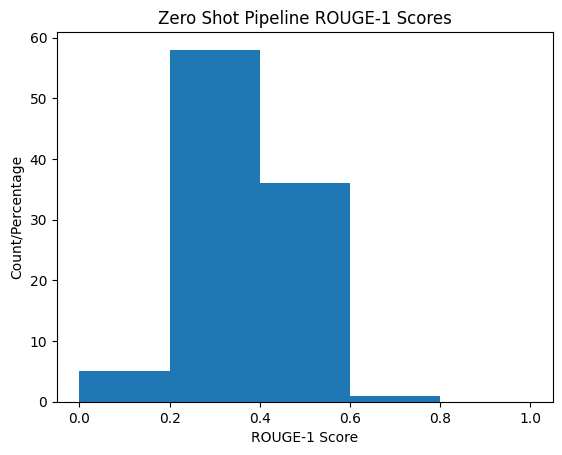

In [110]:
#zero shot summary r1 histogram
plt.hist(zs_scores_r1, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

title = "Zero Shot Pipeline ROUGE-1 Scores"
plt.title(title)

xlabel = "ROUGE-1 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

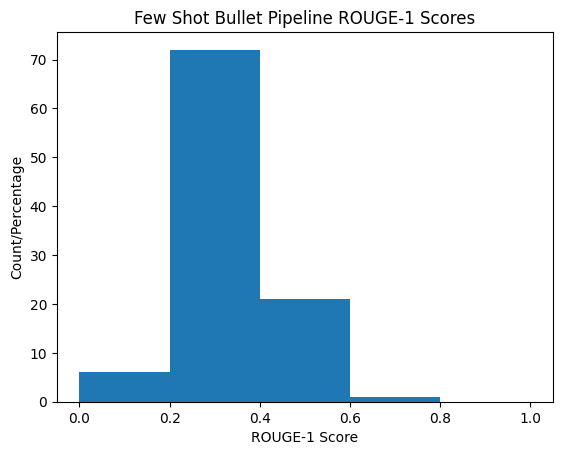

In [111]:
#few shot bullet summary r1 histrogram
plt.hist(fs_bullet_scores_r1, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

title = "Few Shot Bullet Pipeline ROUGE-1 Scores"
plt.title(title)

xlabel = "ROUGE-1 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

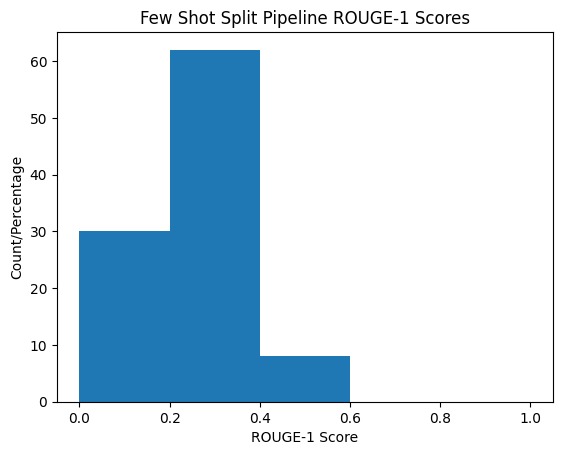

In [112]:
#few shot split summary r1 histogram
plt.hist(fs_split_scores_r1, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

title = "Few Shot Split Pipeline ROUGE-1 Scores"
plt.title(title)

xlabel = "ROUGE-1 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

## R2 Histograms ##

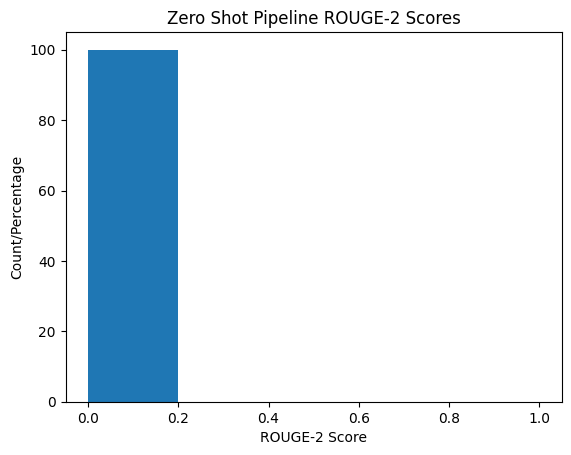

In [113]:
#zero shot summary r2 histogram
plt.hist(zs_scores_r2, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

title = "Zero Shot Pipeline ROUGE-2 Scores"
plt.title(title)

xlabel = "ROUGE-2 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

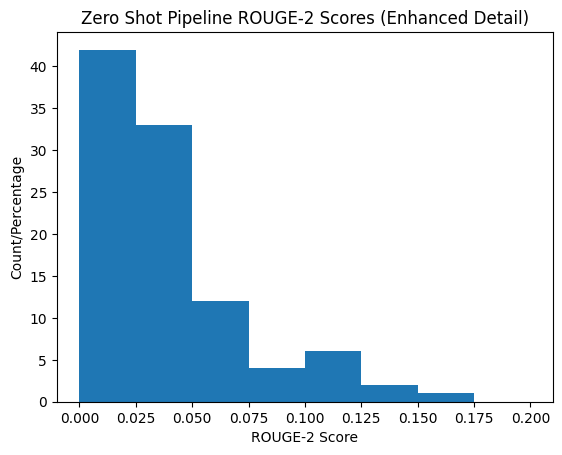

In [114]:
#zero shot summary r2 historgram from 0.0 to 0.2
plt.hist(zs_scores_r2, bins=[0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2])

title = "Zero Shot Pipeline ROUGE-2 Scores (Enhanced Detail)"
plt.title(title)

xlabel = "ROUGE-2 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

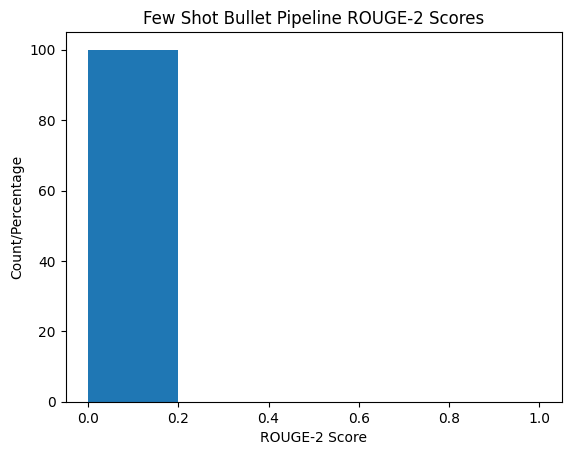

In [115]:
#few shot bullet summary r2 histrogram
plt.hist(fs_bullet_scores_r2, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

title = "Few Shot Bullet Pipeline ROUGE-2 Scores"
plt.title(title)

xlabel = "ROUGE-2 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

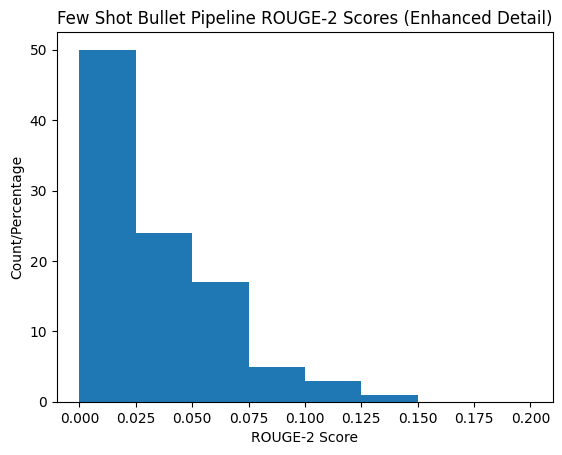

In [116]:
# few shot bullet summary r2 histogram from 0 to 0.2
plt.hist(fs_bullet_scores_r2, bins=[0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2])

title = "Few Shot Bullet Pipeline ROUGE-2 Scores (Enhanced Detail)"
plt.title(title)

xlabel = "ROUGE-2 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

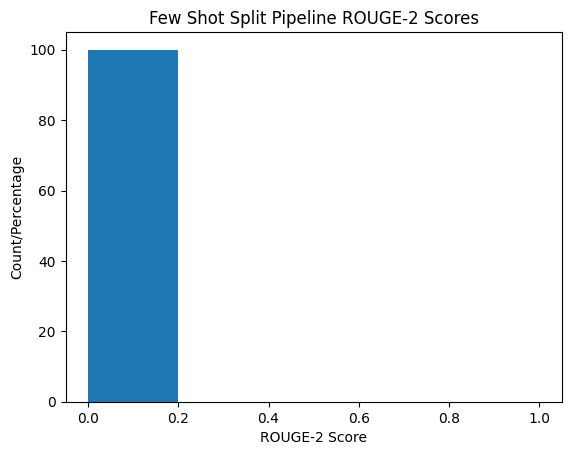

In [117]:
#few shot split summary r2 histogram from 0 to 0.2
plt.hist(fs_split_scores_r2, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])

title = "Few Shot Split Pipeline ROUGE-2 Scores"
plt.title(title)

xlabel = "ROUGE-2 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

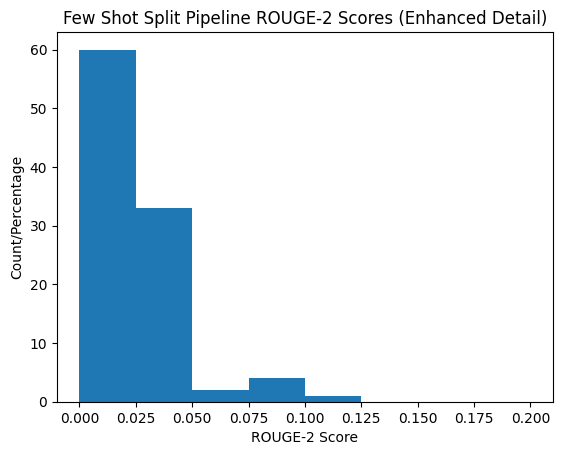

In [118]:
#few shot split summary r2 histogram
plt.hist(fs_split_scores_r2, bins=[0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2])

title = "Few Shot Split Pipeline ROUGE-2 Scores (Enhanced Detail)"
plt.title(title)

xlabel = "ROUGE-2 Score"
plt.xlabel(xlabel)

ylabel = "Count/Percentage"
plt.ylabel(ylabel)

plt.show()

## Avg Score Bar Chart ##

In [119]:
zs_scores_avg_r1 = round(summary_evaluation_ZS["r1-mean"], 3)
zs_scores_avg_r2 = round(summary_evaluation_ZS["r2-mean"], 3)

fs_bullet_scores_avg_r1 = round(summary_evaluation_FSBullet["r1-mean"], 3)
fs_bullet_scores_avg_r2 = round(summary_evaluation_FSBullet["r2-mean"], 3)

fs_split_scores_avg_r1 = round(summary_evaluation_FSSplit["r1-mean"], 3)
fs_split_scores_avg_r2 = round(summary_evaluation_FSSplit["r2-mean"], 3)

print(zs_scores_avg_r1)
print(zs_scores_avg_r2)

print(fs_bullet_scores_avg_r1)
print(fs_bullet_scores_avg_r2)

print(fs_split_scores_avg_r1)
print(fs_split_scores_avg_r2)

0.369
0.038
0.337
0.033
0.26
0.024


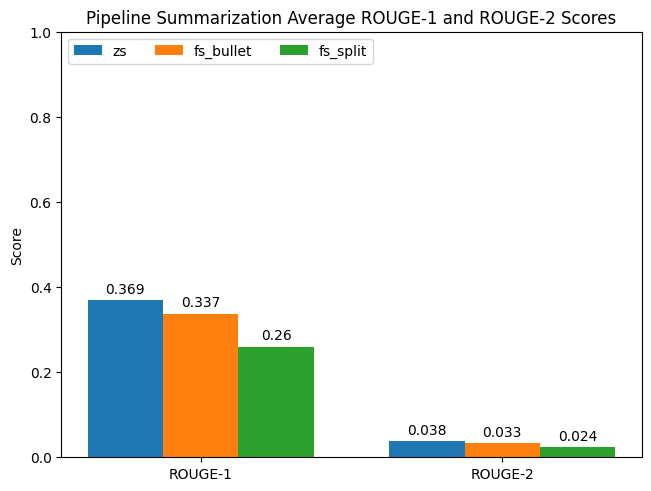

In [120]:
## mean comparison bar chart across all pipelines
##      Much of the code  in this cell was copied from the matplotlib
## documentation for subplots. I do not claim it to be my own.
##   - link: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

metrics = ["ROUGE-1", "ROUGE-2"] # species
pipeline_scores = {
  "zs": (zs_scores_avg_r1, zs_scores_avg_r2),
  "fs_bullet": (fs_bullet_scores_avg_r1, fs_bullet_scores_avg_r2),
  "fs_split": (fs_split_scores_avg_r1, fs_split_scores_avg_r2)
}

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in pipeline_scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Pipeline Summarization Average ROUGE-1 and ROUGE-2 Scores')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

##Median Score Bar Chart##

In [121]:
# Median scores for each pipeline
zs_r1_med = round(stats.median(zs_scores_r1), 3)
zs_r2_med = round(stats.median(zs_scores_r2), 3)

fs_bullet_r1_med = round(stats.median(fs_bullet_scores_r1), 3)
fs_bullet_r2_med = round(stats.median(fs_bullet_scores_r2), 3)

fs_split_r1_med = round(stats.median(fs_split_scores_r1), 3)
fs_split_r2_med = round(stats.median(fs_split_scores_r2), 3)

print(zs_r1_med)
print(zs_r2_med)

print(fs_bullet_r1_med)
print(fs_bullet_r2_med)

print(fs_split_r1_med)
print(fs_split_r2_med)

0.372
0.034
0.335
0.025
0.249
0.02


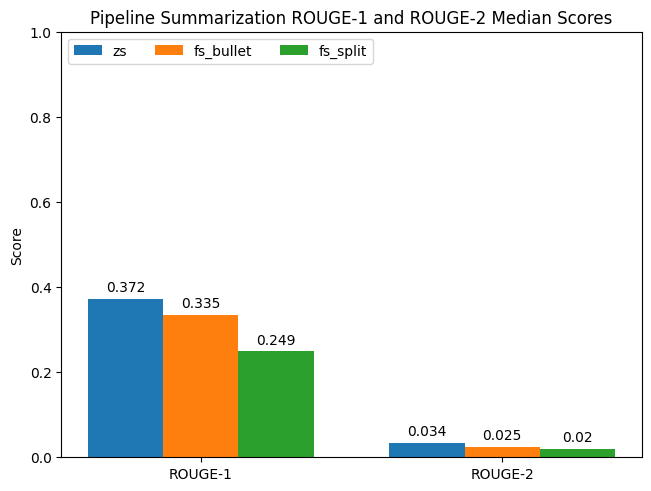

In [122]:
## MEDIAN comparison bar chart across all pipelines
##      Much of the code  in this cell was copied from the matplotlib
## documentation for subplots. I do not claim it to be my own.
##   - link: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

metrics = ["ROUGE-1", "ROUGE-2"] # species
pipeline_scores = {
  "zs": (zs_r1_med, zs_r2_med),
  "fs_bullet": (fs_bullet_r1_med, fs_bullet_r2_med),
  "fs_split": (fs_split_r1_med, fs_split_r2_med)
}

x = np.arange(len(metrics))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in pipeline_scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Pipeline Summarization ROUGE-1 and ROUGE-2 Median Scores')
ax.set_xticks(x + width, metrics)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()